In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from scipy.signal import savgol_filter, detrend
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle
from tools.analysis import *

from boxsers.preprocessing import rubberband_baseline_cor

In [3]:
df1 = pd.read_csv("data/dataset.csv")
df2 = pd.read_csv("data/data3.csv").iloc[:, 1:]
domain = df2.drop(columns=['Hb', 'HbA1c']).columns.astype(np.float32).to_numpy()

In [4]:
df1.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '7461', '7462', '7463', '7464', '7465', '7466', '7467', '7468', 'HbA1c',
       'years'],
      dtype='object', length=7470)

In [5]:
df2.columns

Index(['400.1635', '400.6456', '401.1277', '401.6098', '402.0919', '402.5741',
       '403.0562', '403.5383', '404.0204', '404.5026',
       ...
       '3996.813', '3997.295', '3997.777', '3998.259', '3998.741', '3999.224',
       '3999.706', '4000.188', 'HbA1c', 'Hb'],
      dtype='object', length=7470)

In [6]:
X_df2 = df2.drop(columns=['Hb', 'HbA1c'])
X_df2.columns = domain
X_df2['HbA1c'] = df2['HbA1c']
df2 = X_df2.copy()
df2

,400.163513,400.645599,401.127686,401.609802,402.091888,402.574097,403.056213,403.5383,404.020386,404.502594,...,3996.331055,3996.812988,3997.294922,3997.7771,3998.259033,3998.740967,3999.224121,3999.706055,4000.187988,HbA1c
0,0.342427,0.336845,0.330965,0.324934,0.318939,0.313422,0.309053,0.306493,0.306151,0.308038,...,0.010261,0.010277,0.010292,0.010304,0.010310,0.010312,0.010310,0.010305,0.010300,7.2
1,0.290876,0.287384,0.282910,0.277133,0.269982,0.261934,0.253944,0.247124,0.242393,0.240260,...,0.008771,0.008776,0.008780,0.008784,0.008786,0.008786,0.008784,0.008779,0.008771,9.1
2,0.284154,0.284299,0.285566,0.287428,0.289343,0.291023,0.292534,0.294187,0.296272,0.298805,...,0.009808,0.009806,0.009795,0.009778,0.009756,0.009734,0.009718,0.009712,0.009715,5.6
3,0.324013,0.328069,0.331918,0.334630,0.335661,0.335183,0.334053,0.333418,0.334155,0.336462,...,0.011361,0.011332,0.011306,0.011285,0.011270,0.011260,0.011256,0.011256,0.011260,5.3
4,0.184576,0.185417,0.186708,0.187974,0.188820,0.189097,0.188955,0.188749,0.188826,0.189355,...,0.009395,0.009376,0.009361,0.009350,0.009345,0.009346,0.009350,0.009356,0.009362,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.292312,0.293791,0.295307,0.296455,0.296984,0.296948,0.296711,0.296749,0.297397,0.298669,...,0.010513,0.010502,0.010497,0.010497,0.010500,0.010504,0.010506,0.010507,0.010506,5.4
126,0.232703,0.235006,0.237765,0.240452,0.242631,0.244127,0.245070,0.245787,0.246580,0.247551,...,0.009033,0.009025,0.009013,0.008998,0.008981,0.008966,0.008954,0.008947,0.008945,5.5
127,0.187118,0.184371,0.183669,0.184776,0.187351,0.191008,0.195388,0.200154,0.204942,0.209283,...,0.009806,0.009787,0.009767,0.009747,0.009727,0.009710,0.009696,0.009689,0.009689,7.4
128,0.268240,0.270295,0.273169,0.276142,0.278616,0.280340,0.281479,0.282462,0.283695,0.285311,...,0.010549,0.010528,0.010506,0.010486,0.010468,0.010457,0.010452,0.010453,0.010460,6.9


In [7]:
X_df1 = df1.drop(columns=['years', 'HbA1c'])
X_df1.columns = domain
X_df1['HbA1c'] = df1['HbA1c']
df1 = X_df1.copy()
df1

,400.163513,400.645599,401.127686,401.609802,402.091888,402.574097,403.056213,403.5383,404.020386,404.502594,...,3996.331055,3996.812988,3997.294922,3997.7771,3998.259033,3998.740967,3999.224121,3999.706055,4000.187988,HbA1c
0,0.218005,0.219062,0.221151,0.223613,0.225833,0.227473,0.228559,0.229367,0.230196,0.231184,...,0.009078,0.009077,0.009074,0.009070,0.009066,0.009061,0.009055,0.009048,0.009040,5.80
1,0.235756,0.237171,0.238089,0.237939,0.236417,0.233711,0.230487,0.227615,0.225840,0.225530,...,0.009708,0.009705,0.009699,0.009691,0.009680,0.009668,0.009657,0.009649,0.009646,5.08
2,0.261524,0.264529,0.267711,0.270232,0.271406,0.271031,0.269475,0.267460,0.265697,0.264599,...,0.007985,0.007995,0.008008,0.008024,0.008040,0.008058,0.008075,0.008092,0.008107,7.50
3,0.274799,0.278454,0.282762,0.286734,0.289707,0.291557,0.292687,0.293748,0.295275,0.297400,...,0.007600,0.007627,0.007653,0.007674,0.007688,0.007694,0.007692,0.007685,0.007673,4.46
4,0.223600,0.225310,0.227360,0.229167,0.230353,0.230925,0.231297,0.232071,0.233744,0.236466,...,0.010029,0.010025,0.010028,0.010034,0.010041,0.010048,0.010051,0.010052,0.010049,5.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,0.253261,0.254469,0.255437,0.255796,0.255311,0.254114,0.252725,0.251827,0.251964,0.253304,...,0.012106,0.012107,0.012100,0.012086,0.012068,0.012050,0.012036,0.012028,0.012027,9.00
448,0.352318,0.352299,0.353075,0.353827,0.353893,0.353158,0.352134,0.351675,0.352509,0.354873,...,0.008796,0.008742,0.008701,0.008674,0.008662,0.008658,0.008657,0.008654,0.008645,6.50
449,0.224357,0.223553,0.223732,0.224696,0.226143,0.227831,0.229672,0.231706,0.233981,0.236420,...,0.006461,0.006417,0.006378,0.006347,0.006329,0.006321,0.006323,0.006330,0.006340,9.70
451,0.332913,0.333179,0.334629,0.336291,0.337391,0.337680,0.337502,0.337541,0.338393,0.340228,...,0.011328,0.011328,0.011320,0.011305,0.011282,0.011256,0.011230,0.011207,0.011190,7.20


<Axes: >

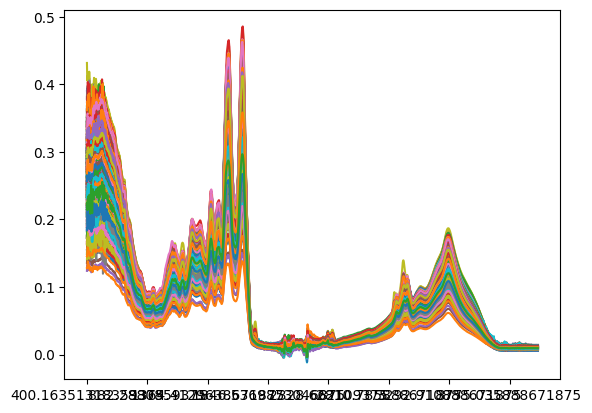

In [8]:
df = pd.concat((df1, df2))
X = df.drop(columns='HbA1c')
df['max_abs'] = X.apply(lambda row: max(row), axis=1)
X.T.plot(legend=False)

<Axes: xlabel='HbA1c', ylabel='Count'>

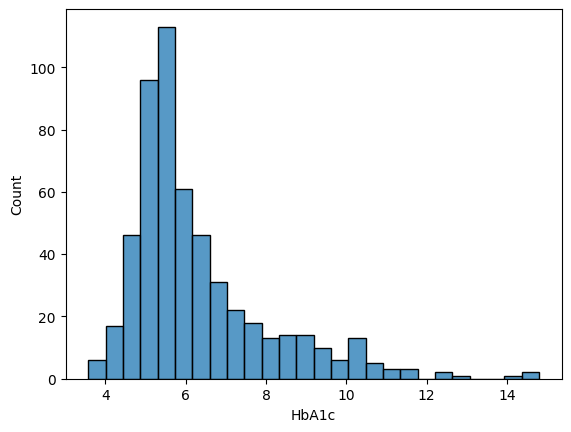

In [9]:
sns.histplot(df['HbA1c'])

264


<Axes: xlabel='HbA1c', ylabel='Count'>

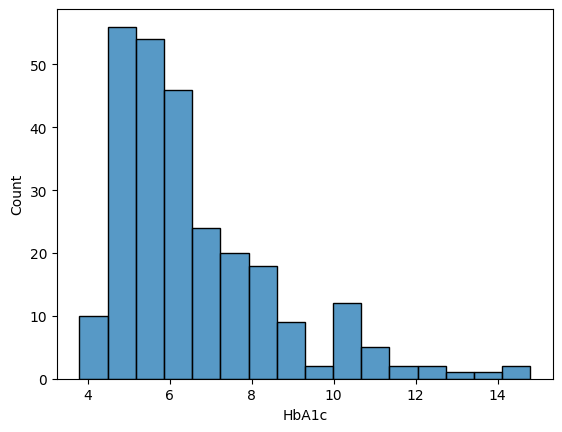

In [25]:
new_df = df[df['max_abs'] >= 0.35]
X = new_df.drop(columns=['HbA1c', 'max_abs'])
y = new_df['HbA1c']
print(len(new_df))
sns.histplot(new_df['HbA1c'])

<Axes: >

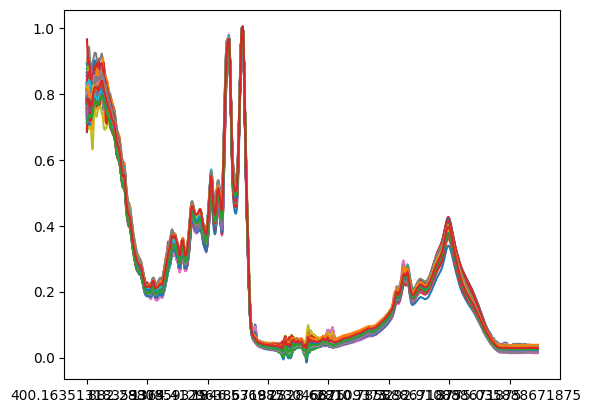

In [26]:
#X = X.T.apply(lambda col: np.ravel(rubberband_baseline_cor(col))).T
X = X.apply(lambda row: row / max(row), axis=1)
X = X.T.apply(lambda col: savgol_filter(col, window_length=50, polyorder=2)).T
#X = X.apply(lambda row: row / np.linalg.norm(row), axis=1)
X.T.plot(legend=False)

In [27]:
class CARS:
    def __init__(self):
        self.weights = []
        self.retain_num = []
        self.retain_ratio = []
        self.r2s = []
        self.rmses = []

    def fit(self, X, y, n_comp, n_rep):
        self.n_samples, self.n_features = X.shape
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        model = PLSRegression(n_components=n_comp)
        model.fit(X_train, y_train)
        
        weights = np.abs(model.coef_[0]) / np.sum(np.abs(model.coef_[0]))
        self.weights.append(weights)
        
        for i in range(1, n_rep + 1):
            
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
            
            pls = PLSRegression(n_components=n_comp)
            pls.fit(X_train, y_train)
        
            a = (self.n_features / 2)**(1 / (n_rep - 1))
            k = np.log(self.n_features / 2) / (n_rep - 1)
            retain_ratio = a * np.exp(-(k * i))
            retain_ratio = 1 if retain_ratio > 0.99 else retain_ratio
            retain_num = int(self.n_features * retain_ratio)
        
            sampled_indices = np.random.choice(np.arange(self.n_features), size=retain_num, replace=False, p=weights)
        
            X_sampled = X_train.iloc[:, sampled_indices]
    
            if len(X_sampled.columns) <= n_comp:
                self.weights = np.array(self.weights)
                self.retain_num = np.array(self.retain_num)
                self.retain_ratio = np.array(self.retain_ratio)
                self.r2s = np.array(self.r2s)
                self.rmses = np.array(self.rmses)
                return 
    
            pls = PLSRegression(n_components=n_comp)
            pls.fit(X_sampled, y_train)
            y_cv = cross_val_predict(pls, X_sampled, y_train, cv=10)
    
    
            reg_coef = np.zeros(self.n_features)
            reg_coef[sampled_indices] = np.abs(pls.coef_[0]) / np.sum(np.abs(pls.coef_[0]))
            unselected_indices = np.setdiff1d(np.arange(self.n_features), sampled_indices)
            reg_coef[unselected_indices] = 0
            weights = reg_coef
            
            self.weights.append(weights)
            self.retain_num.append(retain_num)
            self.retain_ratio.append(retain_ratio)
            self.r2s.append(r2_score(y_train, y_cv))
            self.rmses.append(np.sqrt(mean_squared_error(y_train, y_cv)))
            print(r2_score(y_train, y_cv))

        self.weights = np.array(self.weights)
        self.retain_num = np.array(self.retain_num)
        self.retain_ratio = np.array(self.retain_ratio)
        self.r2s = np.array(self.r2s)
        self.rmses = np.array(self.rmses)
    
        return

    def get_features(self):
        index = np.argmax(self.r2s)
        print(f"R2: {np.max(self.r2s)}\nRMSE: {np.min(self.rmses)}\nIndex: {index}")        
        return np.where(self.weights[index] > 0)[0]

<Axes: xlabel='HbA1c', ylabel='Density'>

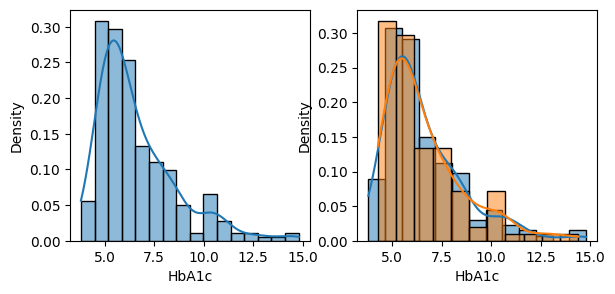

In [28]:
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform', subsample=None, random_state=24)
categories = discretizer.fit_transform(y.to_numpy().reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=categories, random_state=14)

fig, axs = plt.subplots(1, 2, figsize=(6.8, 3))
sns.histplot(y_train, kde=True, stat='density', label='Калібрування', ax=axs[1])
sns.histplot(y_test, kde=True, stat='density', label='Валідація', ax=axs[1])
sns.histplot(y, kde=True, stat='density', label='Усі дані', ax=axs[0])

In [29]:
# cars = CARS()
# cars.fit(X_train, y_train, 8, 200)
# idx = cars.get_features()
# print(len(idx))
# idx

┌───────────────────────────┐
│        FIT RESULTS        │
├───────────────────────────┤
│ RMSE = 1.0907             │
│ R2 = 0.6936               │
│ R = 0.8375                │
│ Number of components = 15 │
└───────────────────────────┘


(<Figure size 1000x800 with 4 Axes>,
 array([[<Axes: xlabel='Num of components', ylabel='$R^2$'>,
         <Axes: xlabel='Num of components', ylabel='RMSE'>],
        [<Axes: xlabel='y true', ylabel='y predicted'>,
         <Axes: xlabel='Sample', ylabel='Residuals'>]], dtype=object))

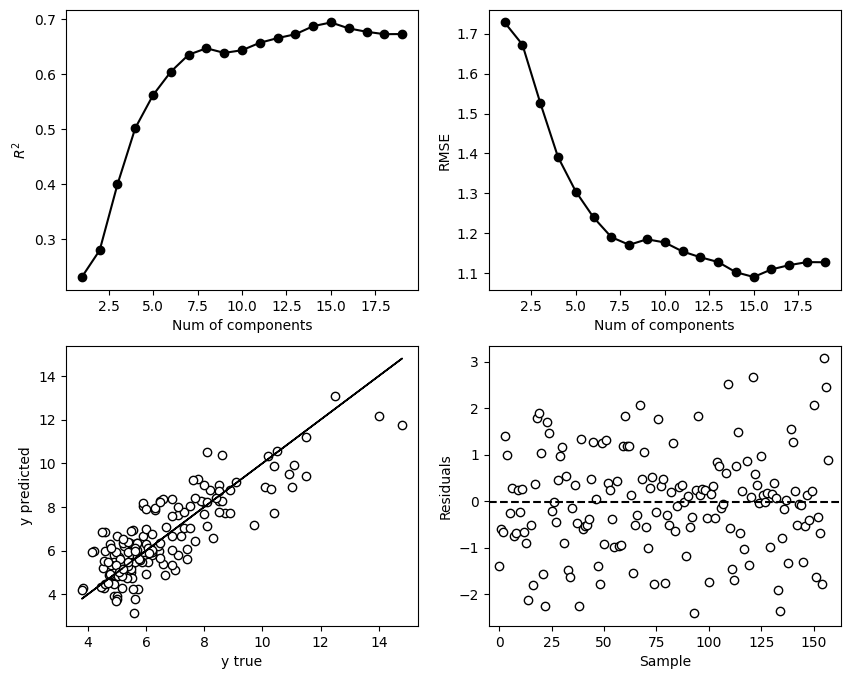

In [30]:
plot_number_components(X_train, y_train, cv=10)

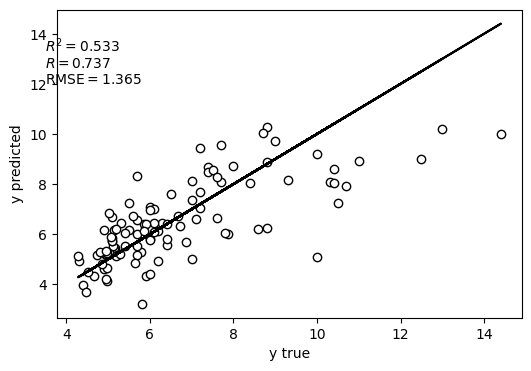

In [32]:
pls = PLSRegression(n_components=8)
pls.fit(X_train, y_train)
y_pred = pls.predict(X_test)
fig, axs = plsr_r2_plot(y_test, y_pred)